# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
try:
    estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    estate = pd.read_csv('real_estate_data.csv', sep='\t')
estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
estate.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Вывод

Методом info() посмотрим данные датафрейма.

Всего 23699 строк. Можно увидеть, что в 14 столбцах есть пропуски. Нужно будет с ними разбираться. 
Так же видем некорректный тип данных у столбцов:

- first_day_exposition должно быть DateTime
- last_price должно быть целое число
- balcony должно быть целое число
- days_exposition должно быть целое число
- floors_total должно быть целое число
- is_apartment должно быть булев тип
- ponds_around3000 должно быть целое число
- parks_around3000 должно быть целое число

Методом describe() посмотрим диапазоны значений.

В rooms минимальное значение 0.
В ceiling_height (высота потолка) тоже есть подозрительные значение 1 м.
В airports_nearest минимальное значения 0, получается квартира прямов аэропорту. 
В days_exposition максимальное значение больше 4 лет. 

Все эти строки надо проверить более внимательно.


## Предобработка данных

Посмотрим на пропуски и решим, что с ними делать.

In [5]:
estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно предположить, что в столбцах ceiling_height, living_area,kitchen_area забыли указать. 

В столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest не указали данные возможно, потому что не знают какое там расстояние до указанных мест. 

Заменить пустые значения в этих столбца могут помочь специалисты. 

В столбце floors_total возможно не указано общее количество этажей, потому что это частный или одноэтажный дом. Заменим на 0. 

В столбце is_apartment должно быть булево значение, либо это аппартаменты, либо нет. Соответственно заменим пустые строки 0, а потом изменим тип столбца.

В столбце balcony пустые значения скорее всего указывают, что банкона в квартире нет. Заменим все пустные значения на 0.

Критичным для нас являются пропуски в столбце locality_name, потому что не понятно где вообще находится данная квартира. Думаю эти строки придется убрать из выборки.

В столбцах parks_around3000 и ponds_around3000 пропуски означают, что рядом этих мест нет. Значит заменим все пустые значения на 0.

В столбце days_exposition пустые значения можно заполнить, рассчитав количество дней с даты размещения.

Заменим возможные пустые значения и преобразуем тип данных к нужным.

- first_day_exposition должно быть DateTime
- last_price должно быть целое число
- balcony должно быть целое число
- days_exposition должно быть целое число
- floors_total должно быть целое число
- is_apartment должно быть булев тип
- ponds_around3000 должно быть целое число
- parks_around3000 должно быть целое число

И проверим, что ничего не забыли исправить.

In [6]:
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
val_to_fill = {'is_apartment': 0, 'balcony': 0, 'days_exposition':0, 'parks_around3000': 0, 'ponds_around3000': 0, 'floors_total':0}
estate = estate.fillna(val_to_fill)

col_to_change = {'is_apartment': 'bool', 'balcony': 'int64', 'parks_around3000': 'int64', \
                 'ponds_around3000': 'int64','days_exposition':'int64', 'last_price':'int64', 'floors_total':'int64'}
estate = estate.astype(col_to_change)

estate.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [7]:
estate = estate.dropna(subset=['floors_total'])

In [8]:
estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра

In [9]:
estate['price_per_square_meter'] = (estate['last_price'] / estate['total_area']).astype('int')

Создадим столбец дня недели

In [10]:
estate['weekday_exposition'] = estate['first_day_exposition'].dt.weekday

Создадим столбец месяца

In [11]:
estate['month_exposition'] = estate['first_day_exposition'].dt.month

Создадим столбец года

In [12]:
estate['year_exposition'] = estate['first_day_exposition'].dt.year

Добавим столбец соотношения жилой плозади к общей

In [13]:
estate['living_to_total'] = estate['living_area'] / estate['total_area']

Добавим столбец отношения площади кухни к общей

In [14]:
estate['kitchen_to_total'] = estate['kitchen_area'] / estate['total_area']

Категоризируем этаж квартиры. Этажей NA у нас нет, а вот total_floor есть 0.36%. Немного - попадут в другой

In [15]:
def floor_category(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'

estate['floor_category'] = estate.apply(floor_category, axis=1)

estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,0,120370,3,3,2019,0.472222,0.231481,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81,82920,1,12,2018,0.460396,0.272277,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.0,558,92785,3,8,2015,0.612500,0.148214,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424,408176,4,7,2015,NaN,NaN,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000,1,6,2018,0.320000,0.410000,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,55,95065,0,9,2018,0.473684,0.299342,другой
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,155,99195,3,11,2017,0.284182,0.386059,другой
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0,NaN,0,110544,3,4,2019,NaN,0.263966,другой
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,NaN,189,87454,2,5,2018,0.465320,0.265682,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,88524,6,2,2017,0.714754,0.106557,другой


При обратотке данных заменили пустые значения в столбцах 'is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total' заменили на ноль и привели все столбцы к нужному типу.

В столбце 'days_exposition' заменили пропуски на ноль, чтобы привести к типу int. Но в дальнейшембудем учитывать, что ноль в данном столбце обозначает, что квартиры еще не проданы.

Удалили строки с нулевыми значениями в столбце floors_total.

Добавили новые столбцы, требуемые в задании.

## Исследовательский анализ данных

### 1. Анализ параметров 

In [16]:
estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


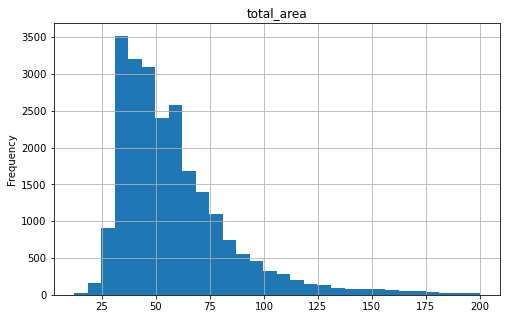

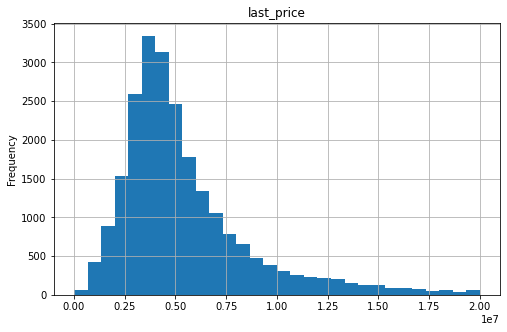

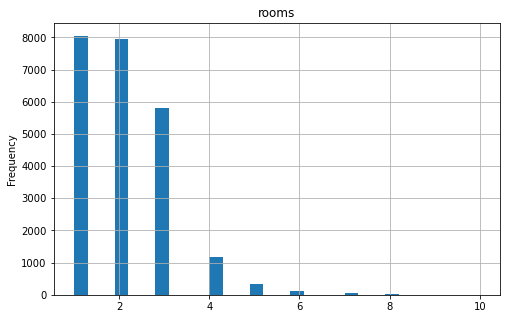

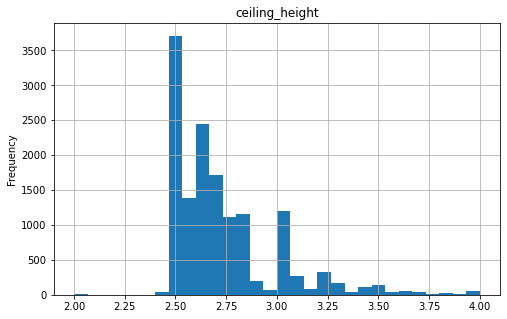

In [17]:
estate['total_area'].plot(kind='hist', bins=30, title='total_area', grid=True, range=(12, 200), figsize=(8,5))
plt.show()
estate['last_price'].plot(kind='hist', bins=30, title='last_price', grid=True, range=(0, 20000000), figsize=(8,5))
plt.show()
estate['rooms'].plot(kind='hist', bins=30, title='rooms', grid=True, range=(1, 10), figsize=(8,5))
plt.show()
estate['ceiling_height'].plot(kind='hist', bins=30, title='ceiling_height', grid=True, range=(2, 4), figsize=(8,5))
plt.show()


### Вывод

Общая площадь квартир в предоставленных данных колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Пуассона. Основные данные расположения между 40 и 70 м2. Выше 120 метров начинаются редкие значения.

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Такая большая разница скорее всего из-за выбросов максимальных сумм до 763млн. Основные значения расположены между 3,4 млн и 6,8 млн рублей. Выше 12 млн начинаются редкие значения. Распределение данных Пуассона.

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных и двукомнатных квартир. Есть некорректные данные - 0 комнат. Редкие значения выше 6 комнат.

Высота потолков в среднем составляет 2,77 м, медиана 2,65 м. Распределение данных Пуассона. Есть данные ниже 2 метров. Скорее всего это некорректные данные, также как и 100 метров.

Во всех данных есть некорректные значения, например 0 комнат, слишком низкая высота потолков в 1 метр или слишком высокая - 100 метров, а также цена квартиры в 12190 рублей. О неадекватных значениях и вероятности их происхождения необходимо узнать у сотрудников источника данных. Для общего изучения данных мы не станем убирать эти значения.

### 2. Время продажи квартиры

In [18]:
estate['days_exposition'][estate['days_exposition']!=0].describe()
# отфильтруем нули, тк по идеи это пустые строки

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

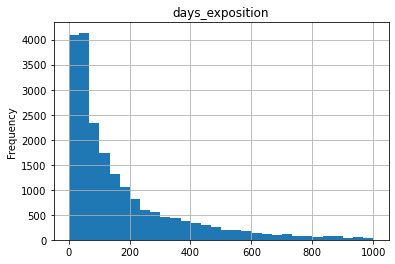

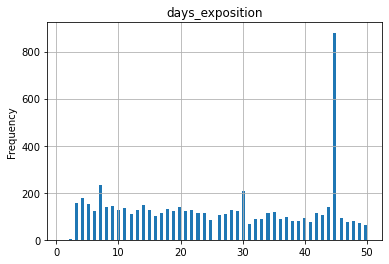

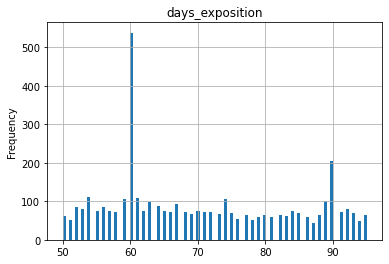

In [19]:
estate['days_exposition'].plot(kind='hist', bins=30, title='days_exposition', grid=True, range=(1, 1000))
plt.show()
estate['days_exposition'].plot(kind='hist', bins=100, title='days_exposition', grid=True, range=(1, 50))
plt.show()
estate['days_exposition'].plot(kind='hist', bins=100, title='days_exposition', grid=True, range=(50, 95))
plt.show()

Построим диаграмму размаха без нулевых дней, которые исказят результат

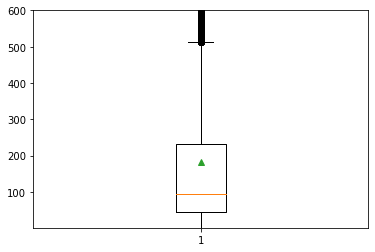

In [20]:
plt.ylim(1,600)
plt.boxplot(estate[estate['days_exposition']!=0]['days_exposition'], showmeans =True)
plt.show()

Посмотрим часто встречающиеся значения

In [21]:
display(estate['days_exposition'].value_counts().head(10))
estate['days_exposition'].value_counts().tail(10)

0     3181
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
Name: days_exposition, dtype: int64

803     1
894     1
1059    1
1458    1
1057    1
1021    1
1362    1
1105    1
795     1
971     1
Name: days_exposition, dtype: int64

### Выводы

Построив гистограммы, мы видим Пуаcсоновское распределение дней размещения. Есть некорректные значения: это максимальный срок размещения 1580 дней. Среднее значение 180 дней сильно искажено за счет выбросов. Медиана 95 дней - обычное время сколько занимает продажа.  
Рассмотрев данные, мы видим скопление обьявлений на значениях 45, 60, 7, 30, 90 - это наиболее популярное количество дней до снятия объявления. 
Межквартильный размах - от 45 до 232 дней.  
От 500 дней, судя по коробке с усами, начинаются выбросы данных. На минимальных значениях выбросов нет.  

Итого необоснованно быстрых значений у нас нет, а необоснованно долгие есть - от 500 дней и выше. 
Нормальными считаются значения у от 1 до 500 дней.

### 3. Аномалии в данных

Рассмотрим аномалии по площади квартиры total_area

In [22]:
estate['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'total_area'}>

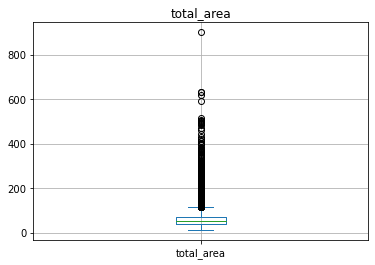

In [23]:
estate['total_area'].plot(kind='box', title='total_area', grid=True)

count    1201.000000
mean      170.466411
std        71.886354
min       116.000000
50%       148.000000
75%       182.000000
max       900.000000
Name: total_area, dtype: float64

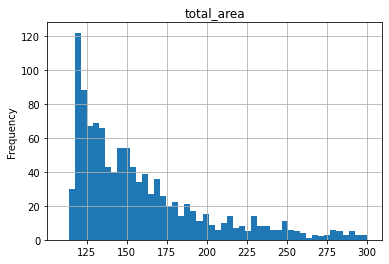

In [24]:
display(estate[(estate['total_area']>=116)]['total_area'].describe(percentiles=[.75]))
estate[estate['total_area']>116]['total_area'].plot(kind='hist', bins=50, title='total_area', grid=True, range=(110, 300))
plt.show()

Построив боксплот, увидели, что выбросы начинаются примерно со 150, но логически понятно, что это не так. Поэтому постоили гистограмму для укрупнения. Наблюдаем устойчивое падение примерно до 260. Отбросим все что больше 260.

Рассмотрим аномалии по стоимости квартиры last_price

In [25]:
estate['last_price'] = estate['last_price'].astype('int')
pd.set_option('float_format', '{:f}'.format)
display(estate['last_price'].describe())
'Медиана', estate['last_price'].median()

count       23699.000000
mean      6541548.771552
std      10887013.267545
min         12190.000000
25%       3400000.000000
50%       4650000.000000
75%       6800000.000000
max     763000000.000000
Name: last_price, dtype: float64

('Медиана', 4650000.0)

Определили квартили и рассмотрим квартиры стоимостью больше размера уса, т е примерно стоимостью более 12 млн

In [26]:
estate[estate['last_price'] > 12000000]['last_price'].value_counts().head(30)

12500000    46
13500000    44
15000000    41
13000000    40
14000000    39
14500000    37
15500000    35
25000000    29
17000000    28
16000000    25
12900000    24
13900000    23
18000000    21
16500000    20
12800000    17
12700000    17
18500000    16
14900000    16
12300000    16
20000000    16
13800000    15
12990000    15
23000000    14
22000000    14
35000000    13
17500000    13
13200000    13
26000000    13
12600000    12
29000000    12
Name: last_price, dtype: int64

Не вижу никаких аномалий.

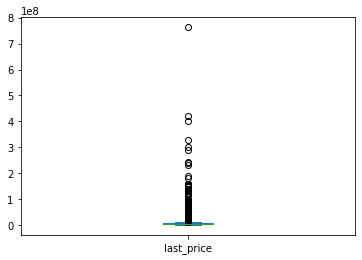

In [27]:
estate['last_price'].plot(kind='box');

Рассмотрим аномалии по комнатам выше 6

In [28]:
estate[estate['rooms'] > 6]['rooms'].value_counts().head(15)

7     59
8     12
9      8
10     3
11     2
14     2
15     1
19     1
16     1
12     1
Name: rooms, dtype: int64

<AxesSubplot:>

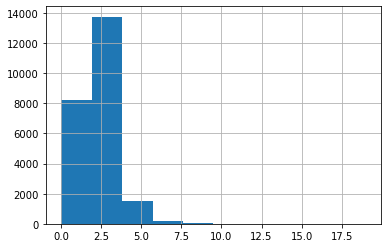

In [29]:
estate['rooms'].hist(bins=10)

Отсекем все квартиры с комнатами больше 6. 

Рассмотрим аномалии повысоте потолков

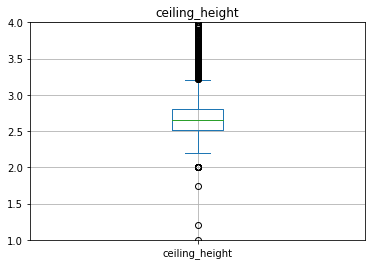

In [30]:
plt.ylim(1,4)
estate['ceiling_height'].plot(kind='box', title='ceiling_height', grid=True)
plt.show()

In [31]:
display(estate[estate['ceiling_height'] < 2.2]['ceiling_height'].value_counts().head(15))
estate[estate['ceiling_height'] > 10]['ceiling_height'].value_counts()

2.000000    11
1.200000     1
1.750000     1
1.000000     1
Name: ceiling_height, dtype: int64

27.000000     8
25.000000     7
32.000000     2
24.000000     1
26.000000     1
14.000000     1
20.000000     1
22.600000     1
27.500000     1
10.300000     1
100.000000    1
Name: ceiling_height, dtype: int64

Рассмотрим аномалии по квартирам c потолком ниже 2 метров и выше 10 метров

In [32]:
display(estate[estate['ceiling_height'] < 2])
estate[estate['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
5712,5,1500000,42.800000,2017-08-14,2,1.200000,2,27.500000,1,False,...,0,NaN,248,35046,0,8,2017,0.642523,0.121495,первый
16934,5,4100000,40.000000,2017-10-17,1,1.750000,37,17.400000,5,False,...,3,80.000000,71,102500,1,10,2017,0.435000,0.208500,другой
22590,16,6000000,55.000000,2018-10-31,2,1.000000,12,32.400000,7,False,...,2,289.000000,13,109090,2,10,2018,0.589091,0.181818,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
355,17,3600000,55.200000,2018-07-12,2,25.000000,5,32.000000,2,False,...,0,NaN,259,65217,3,7,2018,0.579710,NaN,другой
3148,14,2900000,75.000000,2018-11-12,3,32.000000,3,53.000000,2,False,...,0,NaN,0,38666,0,11,2018,0.706667,0.106667,другой
4643,0,4300000,45.000000,2018-02-01,2,25.000000,9,30.000000,2,False,...,1,331.000000,181,95555,3,2,2018,0.666667,0.155556,другой
4876,7,3000000,25.000000,2017-09-27,0,27.000000,25,17.000000,17,False,...,0,NaN,28,120000,2,9,2017,0.680000,NaN,другой
5076,0,3850000,30.500000,2018-10-03,1,24.000000,5,19.500000,1,True,...,1,578.000000,7,126229,2,10,2018,0.639344,0.180328,первый
5246,0,2500000,54.000000,2017-10-13,2,27.000000,5,30.000000,3,False,...,0,NaN,540,46296,4,10,2017,0.555556,0.166667,другой
5669,4,4400000,50.000000,2017-08-08,2,26.000000,9,21.300000,3,False,...,0,NaN,267,88000,1,8,2017,0.426000,0.140000,другой
5807,17,8150000,80.000000,2019-01-09,2,27.000000,36,41.000000,13,False,...,3,80.000000,38,101875,2,1,2019,0.512500,0.150000,другой
6246,6,3300000,44.400000,2019-03-25,2,25.000000,5,31.300000,5,False,...,2,73.000000,0,74324,0,3,2019,0.704955,0.128378,последний
9379,5,3950000,42.000000,2017-03-26,3,25.000000,5,30.000000,2,False,...,0,NaN,0,94047,6,3,2017,0.714286,0.123810,другой


Заменим пустые значения 'ceiling_height' на медианные, согласно места расположения квартиры.  

Сформируем сводную таблицу с группировкой по locality_name и измерением медианного ceiling_height

In [33]:
group_income = estate.groupby('locality_name')['ceiling_height'].median()

for i in group_income.index:
    estate.loc[(estate['locality_name'] == i) & (estate['ceiling_height'].isnull()), 'ceiling_height'] = group_income[i]
    
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23543 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

Отфильтруем данные от аномалий и запишем их в новый датафрейм good_estate


In [34]:
good_estate = estate.query('(2 < ceiling_height < 10) and (0<rooms <= 6) and total_area < 260').copy()
good_estate.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23155 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23155 non-null  int64         
 1   last_price              23155 non-null  int64         
 2   total_area              23155 non-null  float64       
 3   first_day_exposition    23155 non-null  datetime64[ns]
 4   rooms                   23155 non-null  int64         
 5   ceiling_height          23155 non-null  float64       
 6   floors_total            23155 non-null  int64         
 7   living_area             21314 non-null  float64       
 8   floor                   23155 non-null  int64         
 9   is_apartment            23155 non-null  bool          
 10  studio                  23155 non-null  bool          
 11  open_plan               23155 non-null  bool          
 12  kitchen_area            21136 non-null  float6

Посмотрим как изменились среднии и медианы

In [35]:
display(estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())
good_estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()


,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23543.000000
mean,60.348651,6541548.771552,2.070636,2.734102
std,35.654083,10887013.267545,1.078405,1.012723
min,12.000000,12190.000000,0.000000,1.000000
25%,40.000000,3400000.000000,1.000000,2.550000
50%,52.000000,4650000.000000,2.000000,2.700000
75%,69.900000,6800000.000000,3.000000,2.700000
max,900.000000,763000000.000000,19.000000,100.000000


,total_area,last_price,rooms,ceiling_height
count,23155.000000,23155.000000,23155.000000,23155.000000
mean,59.100238,6230254.936212,2.058432,2.701948
std,28.504529,7113974.779659,0.983801,0.229673
min,12.000000,12190.000000,1.000000,2.200000
25%,40.000000,3455500.000000,1.000000,2.550000
50%,52.000000,4650000.000000,2.000000,2.700000
75%,69.400000,6750000.000000,3.000000,2.700000
max,259.600000,330000000.000000,6.000000,8.300000


### Выводы

Аномалии по общей площади не обнаружены. Выше 120 метров начинаются редковстречающиеся значения. Постоили гистограмму и уже опираясь на нее, отсеяли все площади свыше 260 кв м.  
Аномалии по ценам не обнаружены.  
Отсеяли картиры с количеством комнат более 6.   
По высоте потолка данные ниже 2 метров отбросим - похоже на некорректные. Выше 10 метров похожи на неверное место разделителя. Нужно поделить на 10 или данных слишком мало - можно отбросить.  

Существенных изменений в среднем или медиане не произошло.

### 4. Анализ стоимости квартир

Напишем функцию для построения диаграмм и сводной таблицы.

In [36]:
def pvtable_plot(in_estate, x_series):#, y_lim=None):
    #изучим зависимость цены квадратного метра от x_series
    #построим диаграмму рассеяния по данным без обоработки
    in_estate.plot(x=x_series, y = 'price_per_square_meter', style = 'o', kind='scatter', alpha=0.4)#, ylim=y_lim)
    plt.title(x_series)
    plt.show()
    #построим диаграмму рассеяния по median внутри групп x_series
    pvtable = in_estate.pivot_table(index = x_series, values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
    pvtable.columns = ['mean', 'count', 'median']
    pvtable.sort_values('median', ascending = False)
    pvtable.plot(y = 'median', style = 'o', alpha=0.4)
    plt.title(x_series + '_median')
    plt.show()
    pvtable.plot(y = 'median')
    plt.title(x_series + '_median')
    plt.show()
    #выведем коэффициент корреляции x_series и price_per_square_meter
  
    print('Коэффициент корреляции ', x_series, ':', in_estate[x_series].corr(in_estate['price_per_square_meter']))
   
    return pvtable

#### Изучим зависимость цены квадратного метра от общей площади квартиры

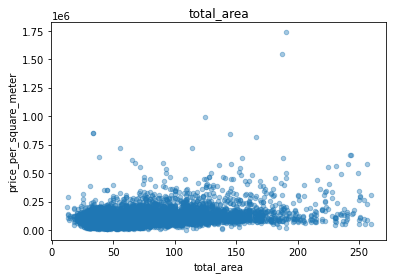

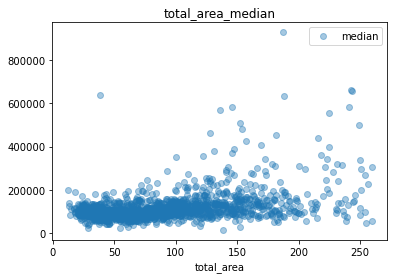

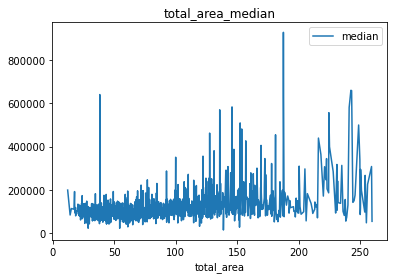

Коэффициент корреляции  total_area : 0.2790430050348047


In [37]:
pvtable_total_area = pvtable_plot(good_estate, 'total_area')

Укрупним для наглядности

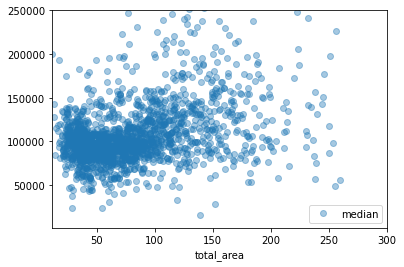

In [38]:
pvtable_total_area.plot(y = 'median', style = 'o', alpha=0.4, xlim=(12,300), ylim=(1000,250000))
plt.show()

Коэффициент корреляции 0.28. Как бы это не казалось странным, но зависимость между площадью и ценой квадратного метра слабая.

#### Изучим зависимость цены квадратного метра от числа комнат

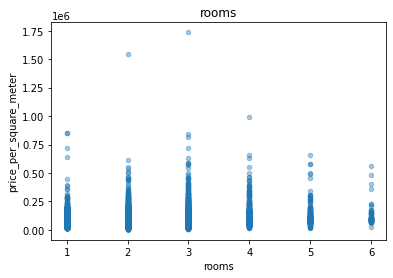

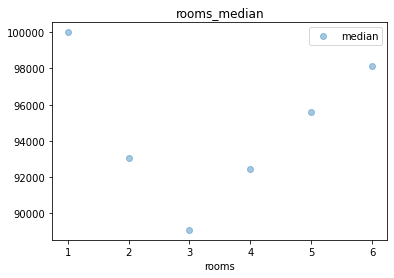

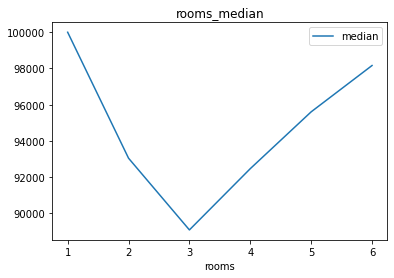

Коэффициент корреляции  rooms : 0.02052406673817231


In [39]:
pvtable_rooms = pvtable_plot(good_estate, 'rooms')

Диаграмма рассеяния по данным без обоработки не дает информации о зависимости цены от количества комнат. Мы видим столбы, что говорит о том, что есть большой разброс цен для одного и того же количества комнат.  
Построим по медианам групп.  

Мы видим нелинейную зависимость, так как сначала при росте комнат от 1 до 3 цена падает, а далее при росте комнат больше 3х - растет. 

#### Изучим зависимость цены квадратного метра от удаленности от центра

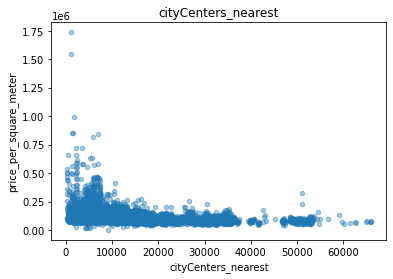

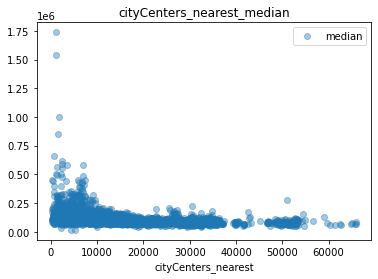

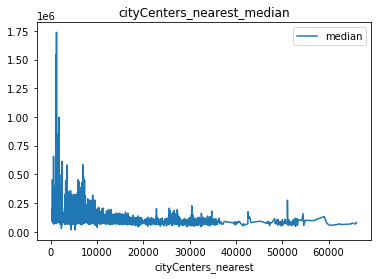

Коэффициент корреляции  cityCenters_nearest : -0.3331240976486873


In [40]:
pvtable_rooms = pvtable_plot(good_estate, 'cityCenters_nearest')

Чем ближе к центру, тем больше стоимость. Это видно из графика и коэффициента корреляции -0.3

#### Изучим зависимость цены квадратного метра от этажа первого, последнего или другого. 

Так floor_category столбец содержит буквенное описание,нельзя будет посчитать коэффициент корреляции. Для этого присвоем цифровые значения в этом столбце.

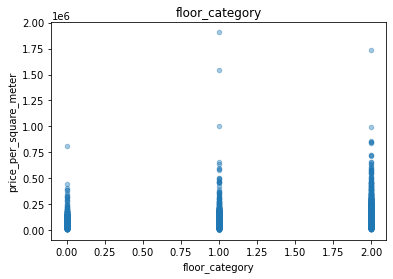

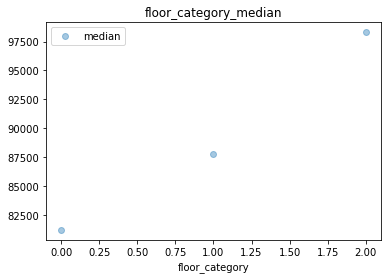

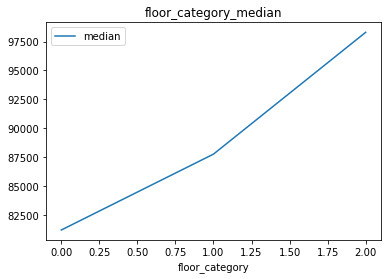

Коэффициент корреляции  floor_category : 0.14692762546361002


,mean,count,median
,price_per_square_meter,price_per_square_meter,price_per_square_meter
floor_category,,,
другой,103268.830388,17092,98275.000000
первый,82357.956001,2841,81395.000000
последний,91776.828367,3222,87886.500000


In [41]:
corr_floorname_price = estate.copy(deep=True)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('первый',0)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('последний',1)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('другой',2)

pvtable_rooms = pvtable_plot(corr_floorname_price, 'floor_category')

good_estate.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])

Корреляция 0.15. Как можно увидеть из графиков, последние этажи стоят дешевле, чем другие, а первые этажи стоят еще дешевле, чем последние. Исходя из расчетов медианы, квартиры на последнем этаже дороже квартир на первом этаже на 10%

#### Изучим зависимость цены квадратного метра от дня недели

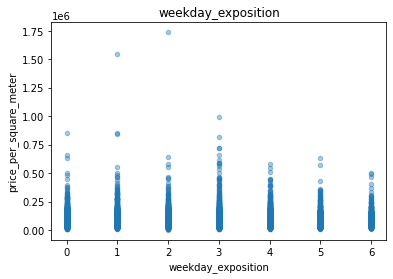

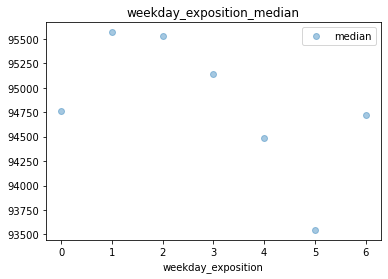

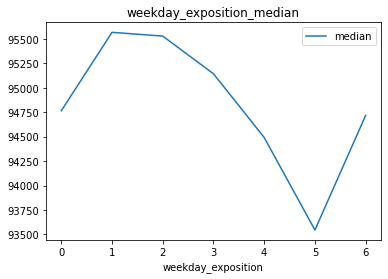

Коэффициент корреляции  weekday_exposition : -0.010048222620308349


In [42]:
pvtable_weekday_exposition = pvtable_plot(good_estate, 'weekday_exposition')

Корреляция очень слабая или имеется другой фактор. Визуально можно резюмировать, что во вторник самая высокая цена, затем к концу недели цена снижается. В субботу самая низкая.

#### Изучим зависимость цены квадратного метра от месяца

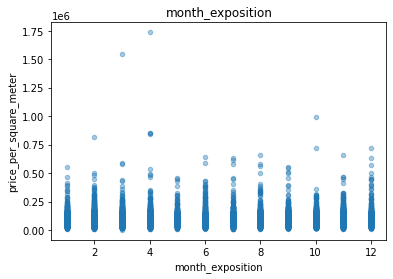

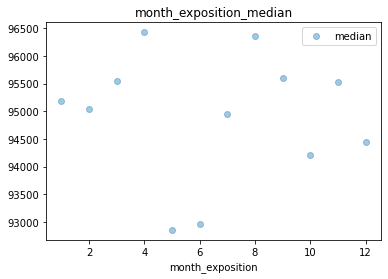

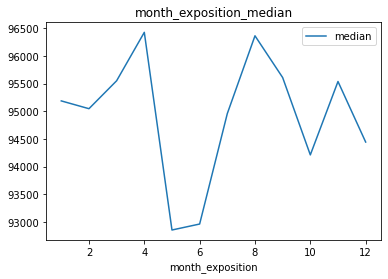

Коэффициент корреляции  month_exposition : -0.002143317056504338


In [43]:
pvtable_month_exposition = pvtable_plot(good_estate, 'month_exposition')

Самая высокая стоимость метра в апреле, августе и ноябре. Самая низкая стоимость с марта по июнь.  
На рынке недвижимости присутствует сезонность - в начале летом скорее всего в связи с отпусками спрос падает, поэтому мы видим наименьшие стоимости недвижимости.

#### Изучим зависимость цены квадратного метра от года размещения

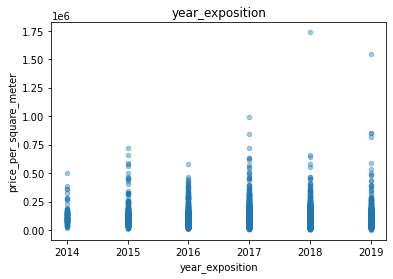

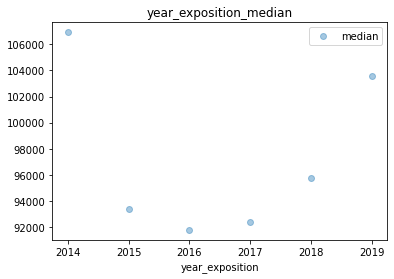

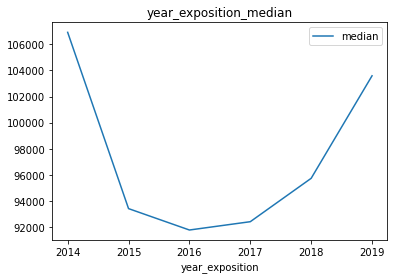

Коэффициент корреляции  year_exposition : 0.015597255687946563


In [44]:
pvtable_year_exposition = pvtable_plot(good_estate, 'year_exposition')

Видно, что с 2014 до 2016 года цена падала, но дальше начала расти.  
Цены взяты в среднем по годам без учета сегментов рынка. Фактически разные сегменты могут себя вести во времени по разному.

### 5. Анализ ТОП-10 населённых пунктов с наибольшим числом объявлений

In [45]:
pvtable_locality_name = good_estate.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc = ['count', 'mean'])
pvtable_locality_name.columns = ['count', 'mean']
pvtable_locality_name = pvtable_locality_name.sort_values(['count','mean'], ascending = False).head(10)

display(pvtable_locality_name)
display(pvtable_locality_name['mean'].idxmax())
display(pvtable_locality_name['mean'].idxmin())

,count,mean
locality_name,,
Санкт-Петербург,15446,114005.892658
посёлок Мурино,494,85070.819838
посёлок Шушары,436,78405.277523
Всеволожск,391,68683.296675
Пушкин,367,103130.405995
Колпино,337,75332.866469
посёлок Парголово,322,90448.000000
Гатчина,306,68757.225490
деревня Кудрово,283,92296.749117


'Санкт-Петербург'

'Выборг'

Выбрали 10 населенных пунктов с максимальным числом обьявлений. Максимальная средняя цена в Санкт-Петербурге. Минимальная - в Выборге.

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр.

Создадим новый столбец cityCenters_nearest_km. Чтобы привести к типу целого, заменим все пустоты числом 100. Максимальное расстояние получилось 66 км, так что потом мы сможем отфильтровать эти значения.

In [46]:
good_estate['cityCenters_nearest_km'] = good_estate['cityCenters_nearest']/1000
#good_estate.sort_values(by='cityCenters_nearest_km', ascending=False)
good_estate['cityCenters_nearest_km'] = good_estate['cityCenters_nearest_km'].fillna(100)
good_estate['cityCenters_nearest_km'] = good_estate['cityCenters_nearest_km'].astype('int64')

pvtable_cityCenters_km = good_estate.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=100').pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc='mean')

pvtable_cityCenters_km

,price_per_square_meter
cityCenters_nearest_km,
0,182935.049383
1,166575.907080
2,144630.895623
3,124920.833663
4,136375.210046
5,144699.418956
6,149505.798246
7,138989.095960
8,119772.770045


Постоим график

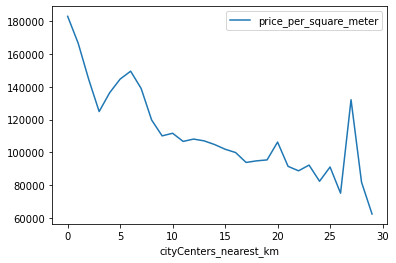

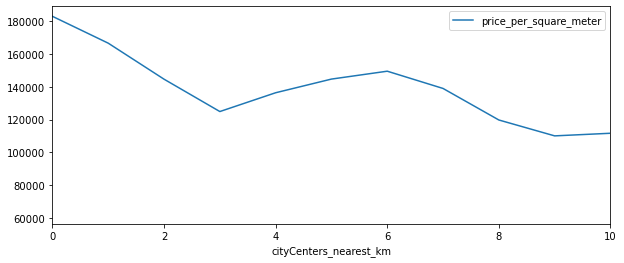

In [47]:
pvtable_cityCenters_km.plot(y = 'price_per_square_meter', kind='line')
plt.show()
pvtable_cityCenters_km.plot(y = 'price_per_square_meter', kind='line', xlim=(0,10), figsize=(10,4))
plt.show()

***Опираясь на график центром будем считать расстояние до 10 км***

### 6. Анализ параметров и стоимости недвижимости в центре

Получим срез недвижимости в центре

In [48]:
estate_centre = good_estate.query('cityCenters_nearest_km <= 10 and locality_name == "Санкт-Петербург"')

estate_centre.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,cityCenters_nearest_km
count,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5354.000000,5817.000000,5327.000000,5817.000000,...,5817.000000,3588.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5354.000000,5327.000000,5817.000000
mean,9.934159,10571669.997937,75.323211,2.444731,2.855152,8.701221,43.841096,4.922125,12.602482,0.416882,...,1.082173,480.616499,187.851470,131047.952897,2.530514,6.349149,2017.244112,0.575726,0.178459,6.103318
std,5.872115,12256538.883397,38.870604,1.124817,0.318231,5.345664,25.488705,3.849957,7.850170,0.851213,...,1.086582,268.988346,250.259913,68921.620273,1.755167,3.442290,1.115521,0.110004,0.078932,2.804831
min,0.000000,12190.000000,12.000000,1.000000,2.400000,0.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,0.000000,111.000000,0.000000,1.000000,2014.000000,0.021583,0.042810,0.000000
25%,5.000000,5200000.000000,46.000000,2.000000,2.700000,5.000000,27.000000,2.000000,8.000000,0.000000,...,0.000000,252.000000,22.000000,96938.000000,1.000000,3.000000,2017.000000,0.509853,0.123810,4.000000
50%,9.000000,7500000.000000,66.000000,2.000000,2.700000,6.000000,37.950000,4.000000,10.300000,0.000000,...,1.000000,457.500000,90.000000,115555.000000,2.000000,6.000000,2017.000000,0.586353,0.157303,6.000000
75%,14.000000,11500000.000000,92.700000,3.000000,3.000000,11.000000,54.875000,6.000000,14.915000,1.000000,...,2.000000,689.000000,249.000000,142553.000000,4.000000,9.000000,2018.000000,0.653498,0.214286,9.000000
max,50.000000,330000000.000000,259.200000,6.000000,8.300000,28.000000,200.000000,26.000000,107.000000,5.000000,...,3.000000,1313.000000,1572.000000,1736842.000000,6.000000,12.000000,2019.000000,0.983447,0.636986,10.000000


Площадь в центре в среднем в пределах 46-93 м2. Число комнат варьируется от 2.7 до 3. Высота потолков обычно от 2.4 до 3 м. Цена 5.2- 115 млн.

#### Изучим зависимость цены квадратного метра от количества комнат

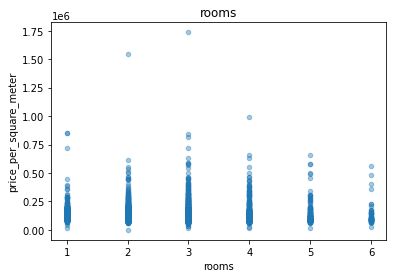

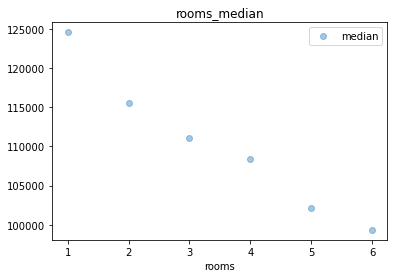

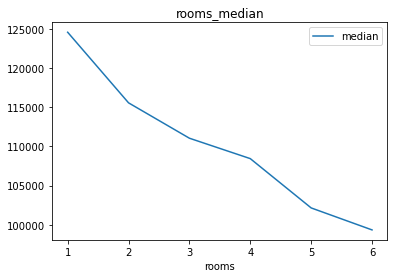

Коэффициент корреляции  rooms : 0.0063643089479321615


,mean,count,median
rooms,,,
1,132507.637078,1273,124567
2,128401.128165,1935,115555
3,131883.186519,1721,111038
4,134254.986644,599,108433
5,131846.330233,215,102140
6,127444.256757,74,99332


In [49]:
pvtable_plot(estate_centre, 'rooms')

Коэффициент корреляции мизерный. Говорить о зависимости цены кв метра от числа комнат не приходится. Присутствует другой фактор.  
На графике видно, что цена при росте общего числа снижается. На общей выборке мы наблюдали рост цен уже при 3 и более комнат.

#### Изучим зависимость цены квадратного метра от этажа

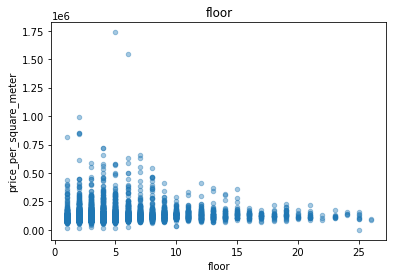

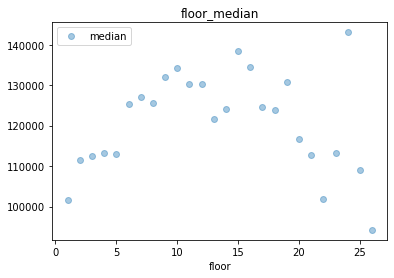

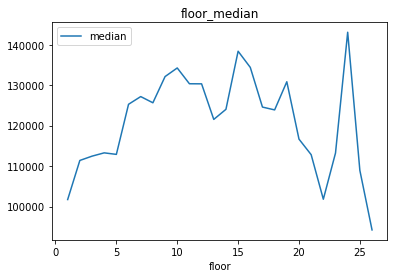

Коэффициент корреляции  floor : 0.06766902011501218


,mean,count,median
floor,,,
1,113373.316535,635,101724.000000
2,127232.527919,985,111392.000000
3,127731.475636,944,112453.000000
4,131691.157062,885,113270.000000
5,132238.290960,708,112892.000000
6,148404.443804,347,125276.000000
7,143068.175573,262,127183.000000
8,147502.873239,213,125650.000000
9,137712.383420,193,132130.000000


In [50]:
pvtable_plot(estate_centre, 'floor')

Квартиры в среднем дешевле на первом этаже, чем на высоких этажах. Также как и в общей выборке.

#### Изучим зависимость цены квадратного метра от расстояния до центра

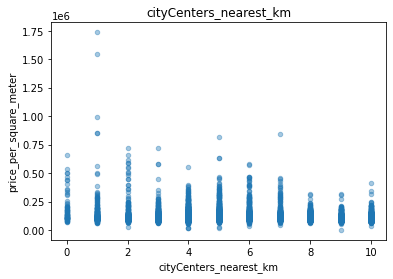

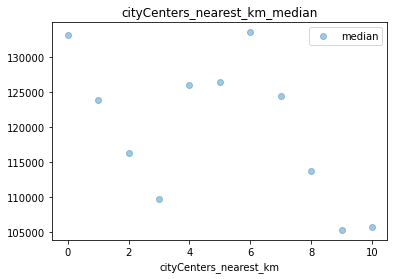

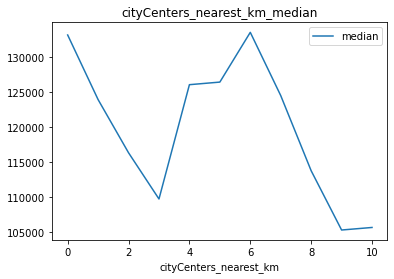

Коэффициент корреляции  cityCenters_nearest_km : -0.19256559086907044


,mean,count,median
cityCenters_nearest_km,,,
0,182935.049383,81,133206.000000
1,166575.907080,226,123966.000000
2,144630.895623,297,116363.000000
3,124920.833663,505,109756.000000
4,136375.210046,876,126099.000000
5,144699.418956,728,126470.000000
6,149505.798246,456,133585.000000
7,138989.095960,396,124541.500000
8,119772.770045,661,113793.000000


In [51]:
pvtable_plot(estate_centre, 'cityCenters_nearest_km')

Зависимость обратная, при удалении от центра цена падает. Причем до 3 км цена резко падает, потом поднимается, а потом снова падает. Есть резкий скачек цен на 6 км. Возможно в районе с 4 до 6 километра располагаются какие-то престижные застройки. На общей выборке была такая же картина: чем дальше от центра, тем ниже цена.

#### Изучим зависимость цены квадратного метра от дня недели размещения

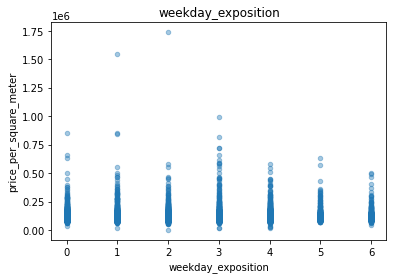

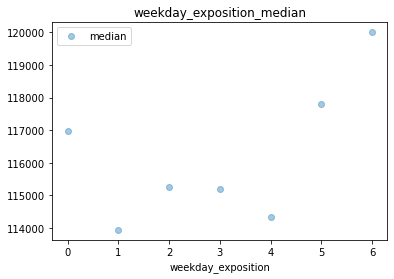

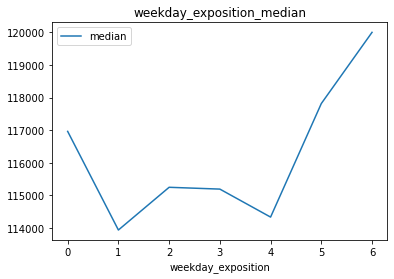

Коэффициент корреляции  weekday_exposition : -0.0016128234047416768


,mean,count,median
weekday_exposition,,,
0,131695.056754,881,116964.000000
1,130617.598274,1043,113941.000000
2,130215.630832,986,115250.500000
3,133205.623201,1112,115195.000000
4,128855.353721,981,114337.000000
5,131833.804100,439,117817.000000
6,131330.760000,375,120000.000000


In [52]:
pvtable_plot(estate_centre, 'weekday_exposition')

Корреляция очень слабая или имеется другой фактор. Визуально можно резюмировать, что ситуация не отличается от общей выборки.  
В понедельник, субботу и воскресенье самая высокая цена. Во вторник и в пятницу самые низкие цены.

#### Изучим зависимость цены квадратного метра от месяца размещения

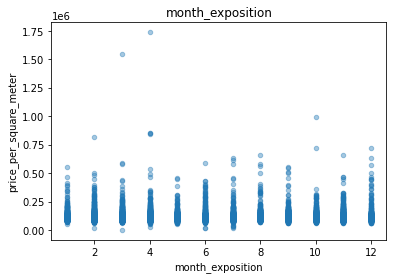

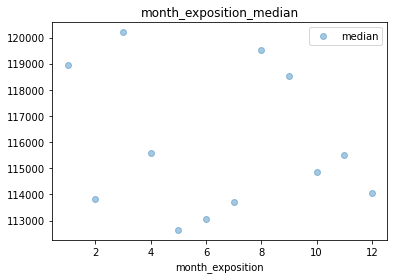

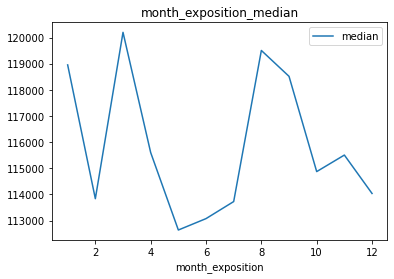

Коэффициент корреляции  month_exposition : -0.007947917742524431


,mean,count,median
month_exposition,,,
1,133931.930748,361,118954.000000
2,130573.152886,641,113835.000000
3,132683.318038,632,120200.000000
4,135058.301394,574,115600.500000
5,124824.285311,354,112637.000000
6,129738.429185,466,113073.000000
7,128096.294118,442,113725.500000
8,134629.359338,423,119507.000000
9,129586.664659,498,118516.500000


In [53]:
pvtable_plot(estate_centre, 'month_exposition')

Ситуация отличается от общей выборки. Самая высокая стоимость метра в январе, марте и августе.  Самая низкая стоимость в февраля и мае.  

#### Изучим зависимость цены квадратного метра от года размещения

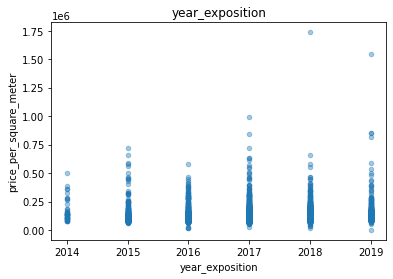

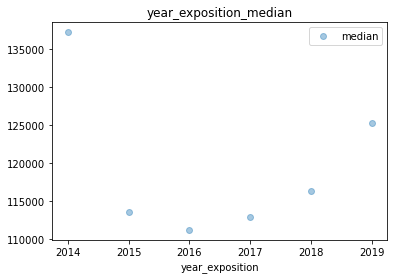

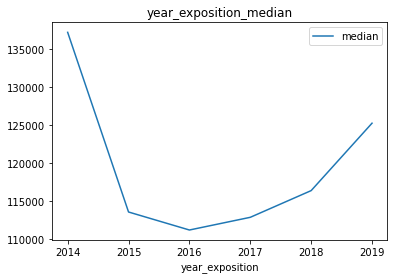

Коэффициент корреляции  year_exposition : 0.012231192030954022


,mean,count,median
year_exposition,,,
2014,159667.636364,55,137167.000000
2015,134394.208716,436,113599.000000
2016,129032.806452,775,111237.000000
2017,128481.026157,1988,112903.000000
2018,128785.966737,1894,116406.500000
2019,142880.449925,669,125250.000000


In [54]:
pvtable_plot(estate_centre, 'year_exposition')

Видно, что с 2014 до 2016 года цена падала. А затем начала расти.  
Одинаковая ситуация в целом по рынку СПБ.  

## Общий вывод

Мы рассмотрели и обработали полученные данные. Заменили типы данных на логичные и удобные для дальнейшей работы и анализа. Заполнили пропущенные значения там, где это было необходимо.<br>
Дополнили данные расчетными величинами: ценой квадратного метра жилья, дни недели, месяцы и года из даты размещения объявлений, добавили категории по этажам квартир. <br>
Изучили параметры на наличие аномальных значений. Были определены аномалии в высоте потолка и общем количестве этажей. Строки с пустыми значениями общего количества этажей были удалены. Их было всего 86 из 23699. Пустые значения в высоте потолков заменили на медианные, с учетом место расположения квартиры.<br>
После удаления аномальных значений число строк сократилось до 23155.<br>
Мы выявили при помощи диаграммы размаха, что необоснованно долгие продажи от 500 дней и выше. Нормальными считаются значения от 1 до 500 дней. <br>
Выявлено, что на стоимость квадратного метра недвижимости больше всего влияют количество комнат, этаж квартиры, удаленность от центра, месяц и год размещения. Данная зависимость характерна как и для центра, так и для всего рынка недвижимости.<br>
Незначительно на стоимость квадратного метра влияют день размещения и общая площадь.<br>
Опираясь на график изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 10 километров.<br>
Видно, что с 2014 до 2016 года цена падала, но дальше начала увеличиваться. В центре ситуация идентичная.  
Цены взяты в среднем по годам без учета сегментов рынка. Фактически разные сегменты могут себя вести во времени по разному.